In [158]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Fragments

In [159]:
# Goal: Test basic rdkit functionality by testing molecules for OH, CO2H,
# and NH2.
# http://asteeves.github.io/blog/2015/01/12/molecules-in-rdkit/

In [160]:
def neutral_loss_finder(targets, structure):

    for sub, present in targets.items():
        if structure.HasSubstructMatch(sub) == True:
            targets[sub] = True
    
    return(targets)

In [169]:
def fragment_finder(molecule):
    # But how to define for arbitrary functional groups?
    
    aliphatic_carboxylic_acids = rdkit.Chem.Fragments.fr_Al_COO(molecule)
    aliphatic_hydroxyl_groups = rdkit.Chem.Fragments.fr_Al_OH(molecule)
    primary_amines = rdkit.Chem.Fragments.fr_NH2(molecule)
    return({"-CO2": aliphatic_carboxylic_acids,
            "-OH": aliphatic_hydroxyl_groups,
            "-NH2": primary_amines})

In [161]:
# Do more test cases!

ser = Chem.MolFromSmiles('C(C(C(=O)O)N)O')
val = Chem.MolFromSmiles('CC(C)C(C(=O)O)N')

In [162]:
Chem.MolToSmiles(ser)

'NC(CO)C(=O)O'

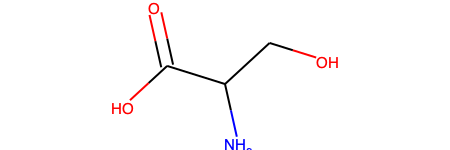

In [163]:
ser

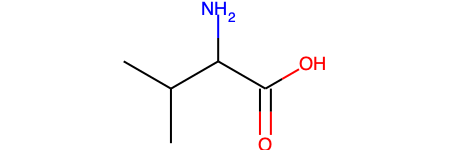

In [164]:
val

In [165]:
hydroxy = Chem.MolFromSmiles('CO') # CR_x-O_x, not CR_x-OH.
amine = Chem.MolFromSmiles('CN') # Similiar issue, especially oxidation.
carboxyl = Chem.MolFromSmiles('C(=O)O') # will fault on esters (CO2R) etc.

targets = {hydroxy: False, amine: False, carboxyl: False}

In [166]:
# This is broken, as the SMILES I drew above are not specific enough.

ser_results = neutral_loss_finder(targets, ser)
val_results = neutral_loss_finder(targets, val)

In [167]:
ser_results

{<rdkit.Chem.rdchem.Mol at 0x11d0aca80>: True,
 <rdkit.Chem.rdchem.Mol at 0x11d0ac9e0>: True,
 <rdkit.Chem.rdchem.Mol at 0x11d0acd00>: True}

In [168]:
val_results

{<rdkit.Chem.rdchem.Mol at 0x11d0aca80>: True,
 <rdkit.Chem.rdchem.Mol at 0x11d0ac9e0>: True,
 <rdkit.Chem.rdchem.Mol at 0x11d0acd00>: True}

In [170]:
ser_results_2 = fragment_finder(ser)

In [175]:
# This works!

ser_results_2

{'-CO2': 1, '-OH': 1, '-NH2': 1}

In [176]:
val_results_2 = fragment_finder(val)

In [177]:
# This works!

val_results_2

{'-CO2': 1, '-OH': 0, '-NH2': 1}